<a href="https://colab.research.google.com/github/ketanp23/sit-neuralnetworks-class/blob/main/Step_Decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scenario: Train a simple neural network on MNIST (handwritten digits) with step decay.
What Happens: Learning rate drops every 10 epochs, helping the model converge smoothly.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8661 - loss: 0.4670 - val_accuracy: 0.9488 - val_loss: 0.1666 - learning_rate: 0.1000
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9563 - loss: 0.1491 - val_accuracy: 0.9647 - val_loss: 0.1173 - learning_rate: 0.1000
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9696 - loss: 0.1084 - val_accuracy: 0.9708 - val_loss: 0.0969 - learning_rate: 0.1000
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9756 - loss: 0.0856 - val_accuracy: 0.9718 - val_loss: 0.0883 - learning_rate: 0.1000
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9814 - loss: 0.0645 - val_accuracy: 0.9739 - val_loss: 0.0808 - learning_rate: 0.1000
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9839 - loss: 0.0570 - val_accuracy: 0.9735 - val_loss: 0.0806 - learning_rate: 0.1000
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - l

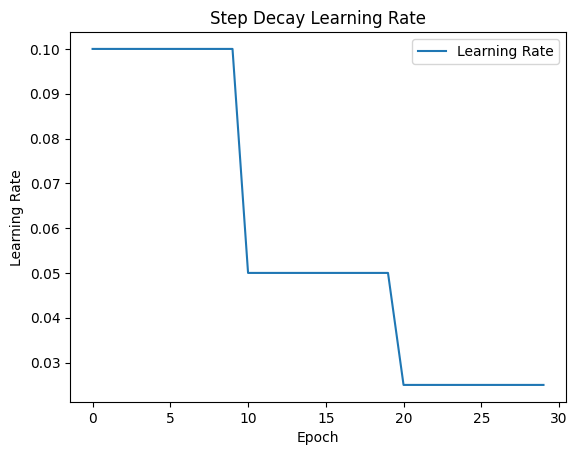

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()
X_train, X_val = X_train / 255.0, X_val / 255.0

# Build model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step decay function
def step_decay(epoch):
    initial_lr = 0.1
    drop_rate = 0.5
    epochs_drop = 10
    lr = initial_lr * (drop_rate ** (epoch // epochs_drop))
    return lr

# Compile with learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)

# Train and plot
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler], batch_size=32)

# Plot learning rate
lrs = [step_decay(i) for i in range(30)]
plt.plot(lrs, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Step Decay Learning Rate')
plt.legend()
plt.show()